In [ ]:
#import required libraries/packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
!pip install -q -U keras-tuner
import IPython
import keras_tuner as kt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
import io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
#load dataset
data = pd.read_csv(io.BytesIO(requests.get("https://archive.ics.uci.edu/static/public/849/power+consumption+of+tetouan+city.zip").content),
                 compression='zip')
# Display the DataFrame
print(data.head())

        DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.96386  
1                20131.08434  

In [ ]:
#display the shape of the dataframe
data.shape

(52416, 9)

In [ ]:
#display the data types in the dataframe
data.dtypes

DateTime                      object
Temperature                  float64
Humidity                     float64
Wind Speed                   float64
general diffuse flows        float64
diffuse flows                float64
Zone 1 Power Consumption     float64
Zone 2  Power Consumption    float64
Zone 3  Power Consumption    float64
dtype: object

In [ ]:
#check if there are NaN values
data.isna().any(axis=0)

DateTime                     False
Temperature                  False
Humidity                     False
Wind Speed                   False
general diffuse flows        False
diffuse flows                False
Zone 1 Power Consumption     False
Zone 2  Power Consumption    False
Zone 3  Power Consumption    False
dtype: bool

In [ ]:
# Convert DateTime to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.head(10)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
5,2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
6,2017-01-01 01:00:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024
7,2017-01-01 01:10:00,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711
8,2017-01-01 01:20:00,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217
9,2017-01-01 01:30:00,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687


In [ ]:
#display the data types in the dataframe to confirm DateTime is now in the datetime data type.
data.dtypes

DateTime                     datetime64[ns]
Temperature                         float64
Humidity                            float64
Wind Speed                          float64
general diffuse flows               float64
diffuse flows                       float64
Zone 1 Power Consumption            float64
Zone 2  Power Consumption           float64
Zone 3  Power Consumption           float64
dtype: object

In [ ]:
#use describe method to get an overview of the data
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


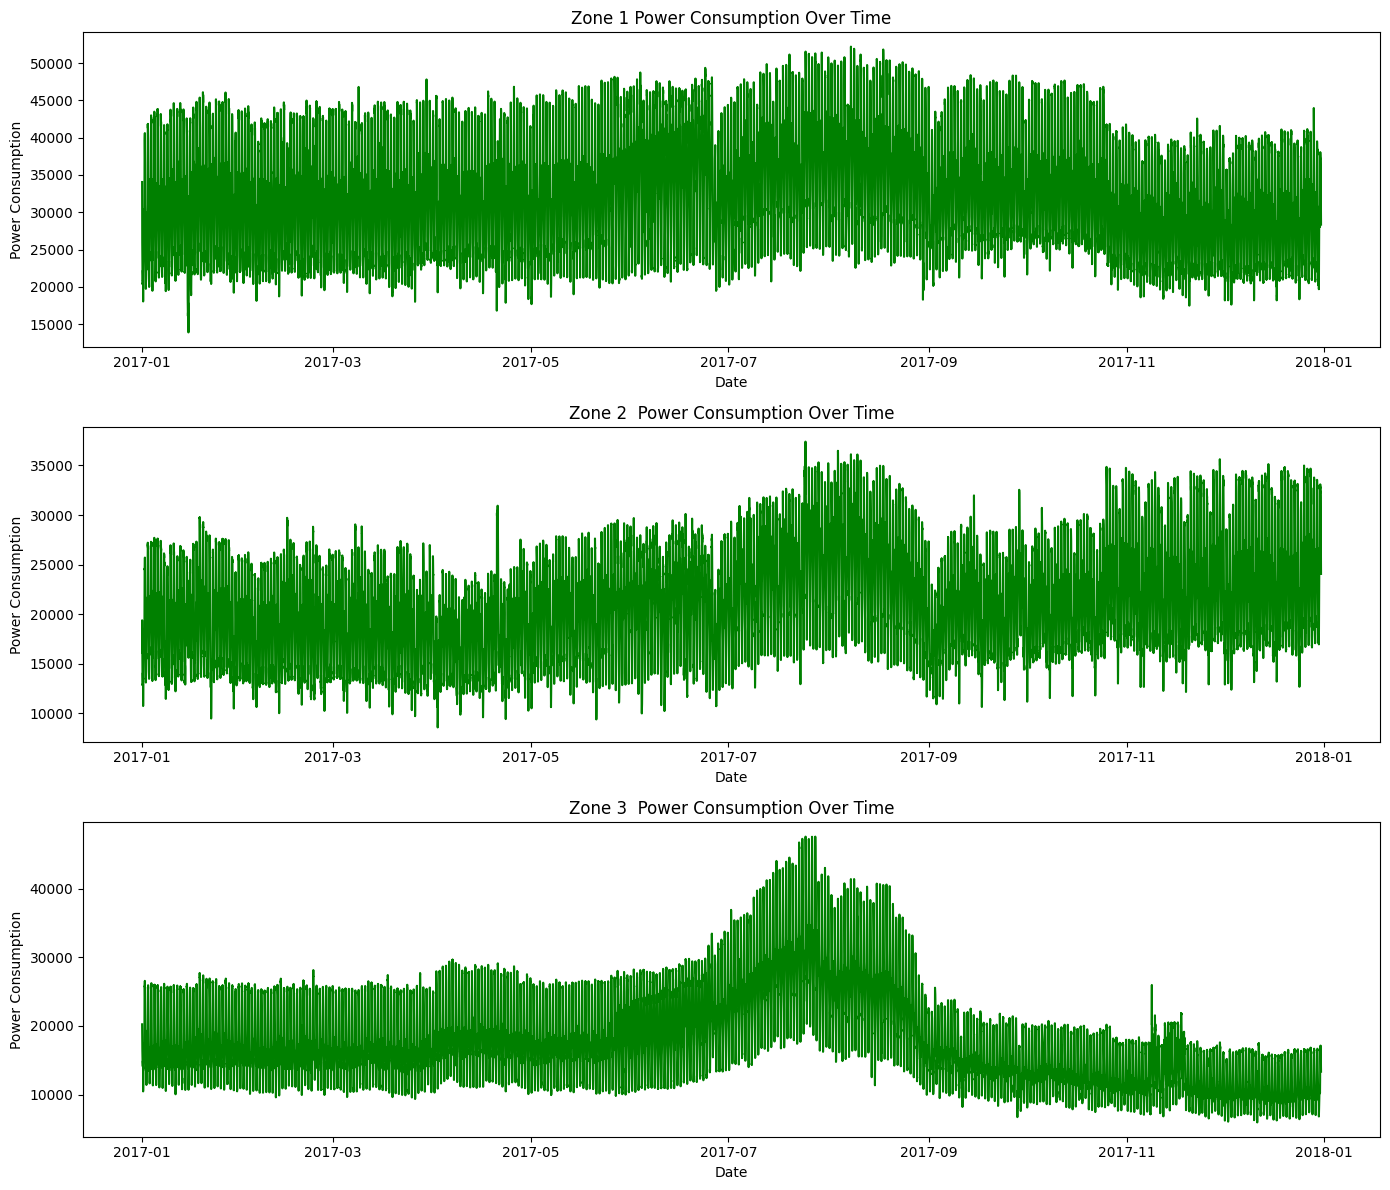

In [ ]:
def plot_series(series, series_index=0):
    """
    This function plots a graph of a time series.
    Arguments:
        series: The input time series.
        series_index: The index of the time series. Defaults to 0.
    """
    xs = series['DateTime']
    y_zone = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
    fig, ax = plt.subplots(3, 1, figsize=(14, 12))
    for i, y in enumerate(y_zone):
        ys = series[y]
        ax[i].plot(xs, ys, label=y, color='green')
        ax[i].set_title(y + ' Over Time')
        ax[i].set_xlabel('Date')
        ax[i].set_ylabel('Power Consumption')
    plt.tight_layout()
    plt.show()
plot_series(data)

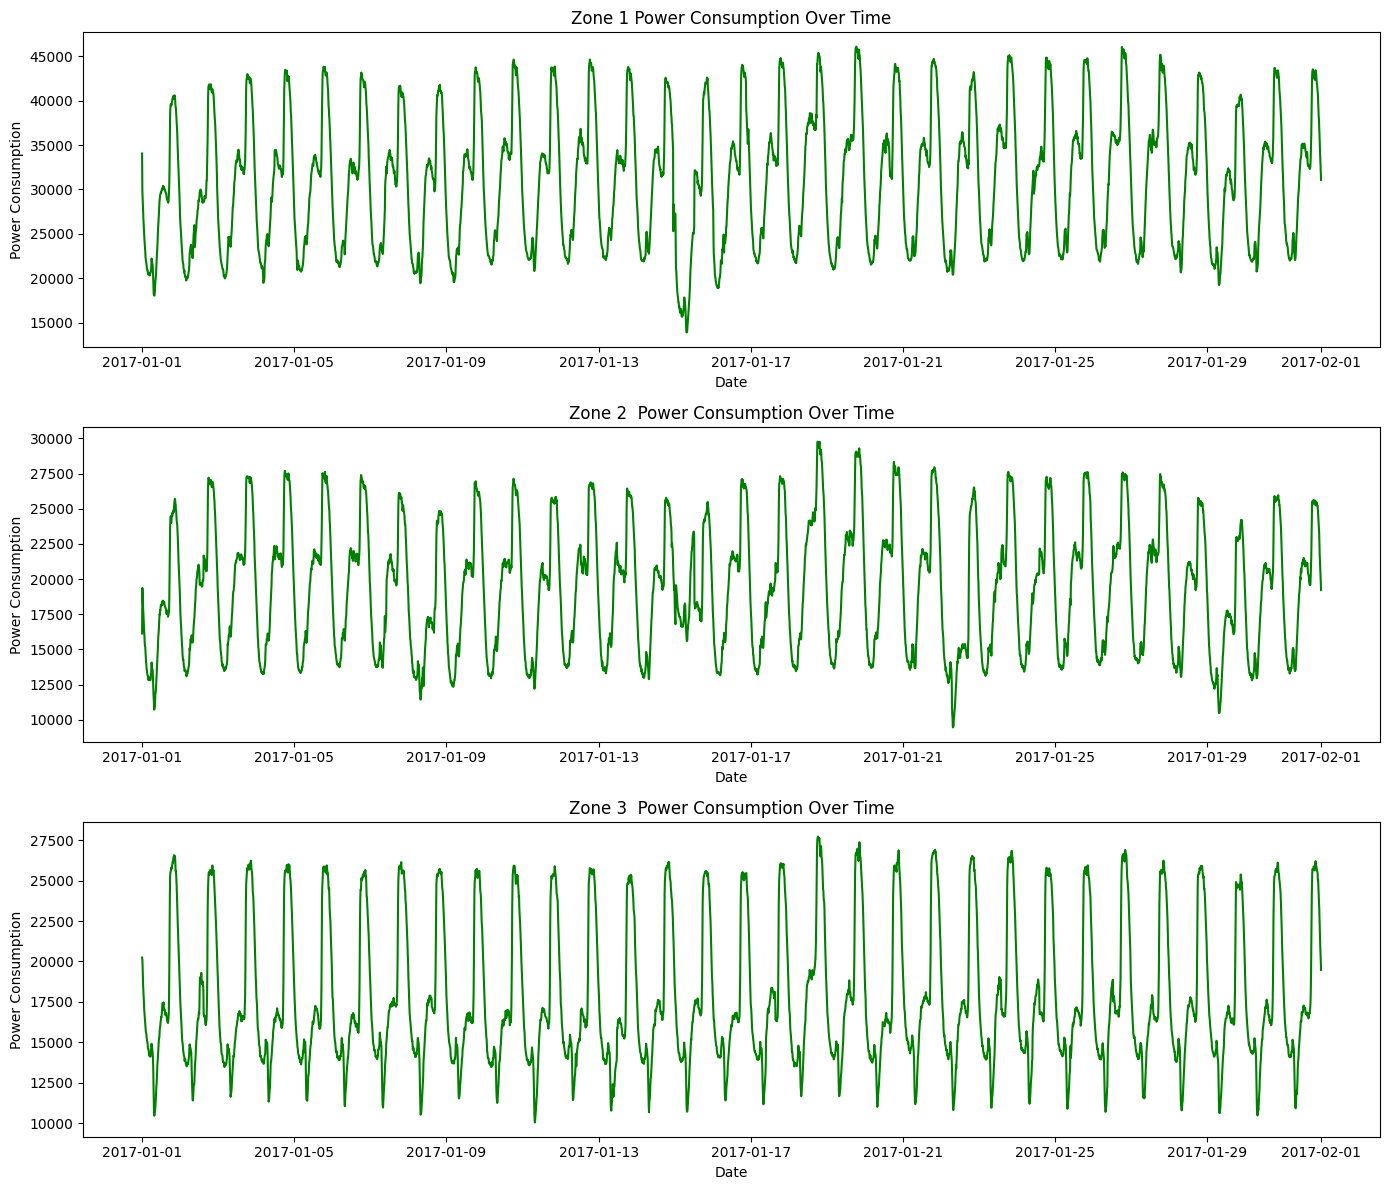

In [ ]:
#plotting the graph for a portion of the entire data showing just one month
plot_series(data[:4464])

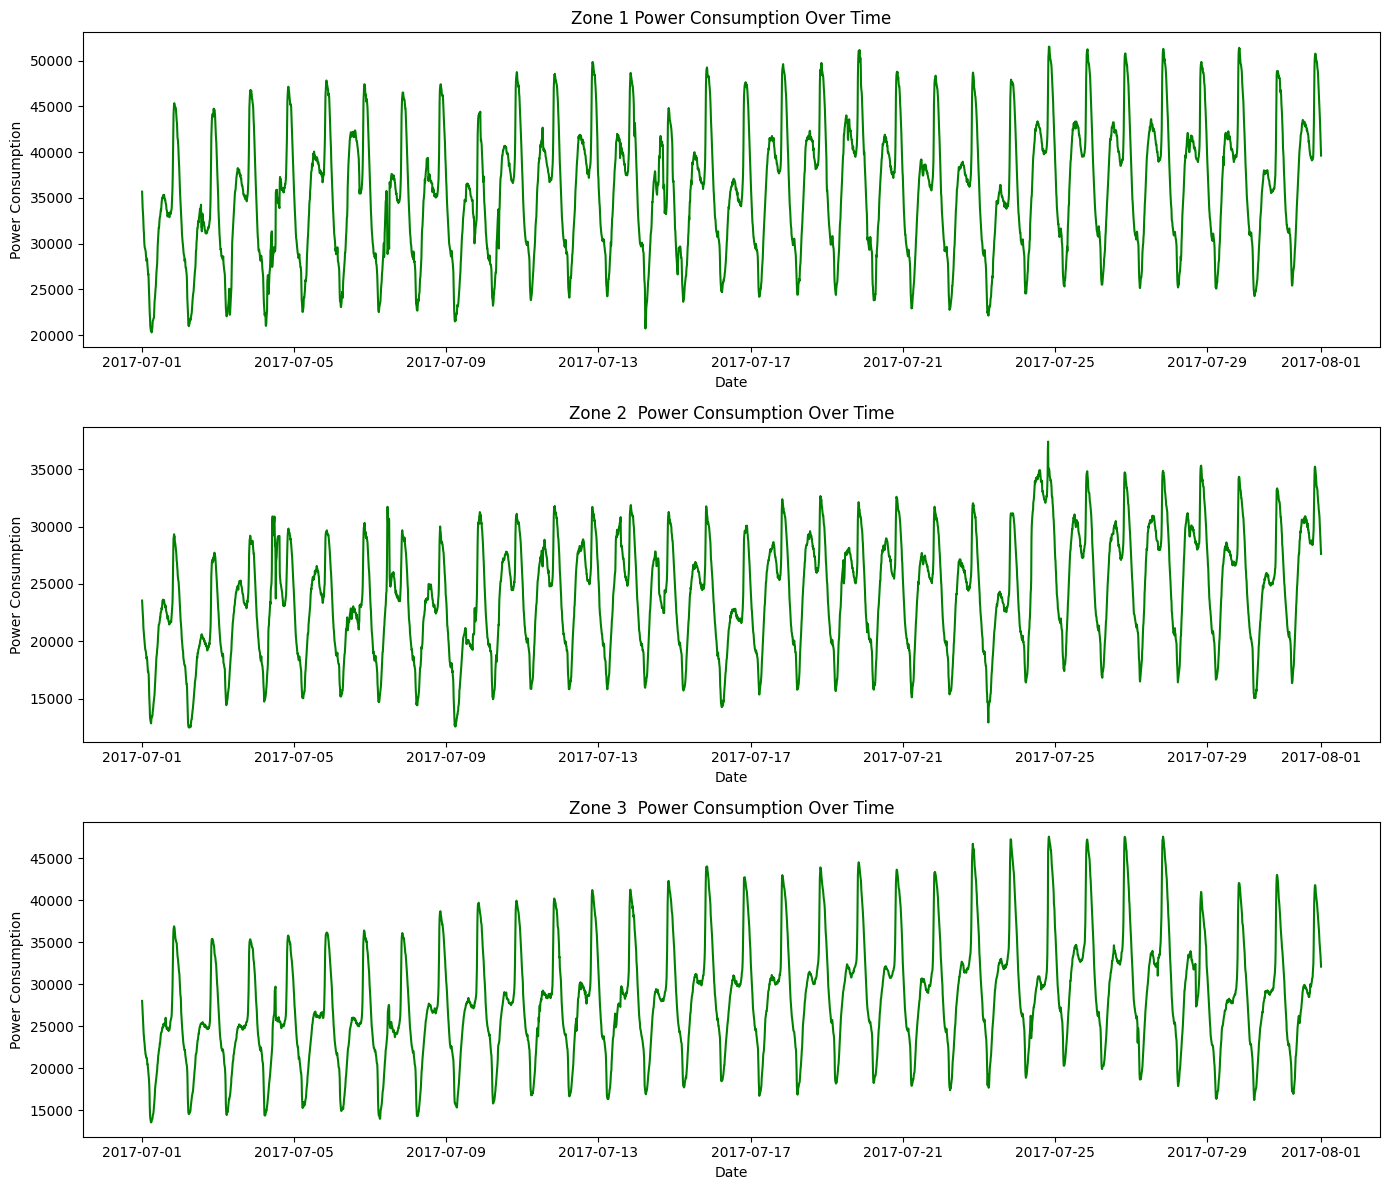

In [ ]:
#plotting the graph for one month (July) during the noticeably peak period.
plot_series(data[26065:30528])

In [ ]:
#initializing the time and series for Zone 1 Power Consumption
tf.keras.utils.set_random_seed(15)
series = tf.convert_to_tensor(data['Zone 1 Power Consumption'])
time = np.arange(data.shape[0])

#Initializing split time, training and validation set.
split_time = 48096
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

#initialize variables window_size, batch_size and buffer_size
window_size = 144
batch_size = 288
buffer_size = 48096

In [ ]:
def win_dataset(series, window_size, batch_size, buffer_size):
    """
    This function converts a time series into a TensorFlow Dataset for training a model.
    Arguments:
        series: The input series of data.
        window_size: The length/size of each sequence window.
        batch_size: Batch size for the dataset.
        buffer_size: Buffer size to be used.
    Returns:
        dataset: A TensorFlow Dataset containing input-output pairs for training a model.
    """
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1,drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.shuffle(buffer_size).map(lambda window:(window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [ ]:
#initializing the training and validation set using the win_dataset function
train_set = win_dataset(x_train, window_size, batch_size, buffer_size)
valid_set = win_dataset(x_valid, window_size, batch_size, buffer_size)

In [ ]:
def build_model(hp):
    """
    This function takes hyperparameters as arguments and
    returns a DNN sequential model based on the defined hyperparameters
    """
    model = Sequential()
    model.add(
        Dense(
            #Tune number of units.
            units=hp.Int("units", min_value=128, max_value=512, step=12),
            input_shape=[window_size],
            #Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "elu"]),
        )
    )
    model.add(
        Dense(
            #Tune number of units.
            units=hp.Int("units2", min_value=128, max_value=512, step=12),
            #Tune the activation function to use.
            activation=hp.Choice("activation2", ["relu", "elu"]),
        )
    )
    model.add(Dense(1))
    #Tune the optimizers to use.
    hp_optimizer = hp.Choice('optimizer', ['Adam', 'RMSProp', 'Adagrad', 'Adamax'])
    model.compile(loss="mae",optimizer=hp_optimizer)
    return model

In [ ]:
#initialize tuner
tuner = kt.BayesianOptimization(
    hypermodel=build_model,
    objective = ("loss"),
    max_trials=10,
    overwrite=True,
)

In [ ]:
#search for the best hyperparameter values
tuner.search(train_set, epochs=10, validation_data=(valid_set))

Trial 10 Complete [00h 03m 22s]
loss: 631.3707275390625

Best loss So Far: 631.3707275390625
Total elapsed time: 00h 32m 24s


In [ ]:
#get the values of the best hyperparameters
tuner.get_best_hyperparameters()[0].values

{'units': 392,
 'activation': 'elu',
 'units2': 440,
 'activation2': 'relu',
 'optimizer': 'Adamax'}

In [ ]:
#train model using best hyperparameter values
best_hps = tuner.get_best_hyperparameters(num_trials = 5)[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_set, epochs = 10, validation_data = valid_set, verbose=1)
model.summary()

Epoch 1/10
167/167 [==============================] - 19s 29ms/step - loss: 3398.7244 - val_loss: 1336.3179
Epoch 2/10
167/167 [==============================] - 18s 28ms/step - loss: 1258.0765 - val_loss: 620.6354
Epoch 3/10
167/167 [==============================] - 18s 27ms/step - loss: 1154.6199 - val_loss: 1419.3457
Epoch 4/10
167/167 [==============================] - 18s 35ms/step - loss: 969.7787 - val_loss: 575.3713
Epoch 5/10
167/167 [==============================] - 18s 27ms/step - loss: 782.8801 - val_loss: 481.2326
Epoch 6/10
167/167 [==============================] - 21s 45ms/step - loss: 901.8525 - val_loss: 1021.2581
Epoch 7/10
167/167 [==============================] - 19s 38ms/step - loss: 697.3738 - val_loss: 415.8622
Epoch 8/10
167/167 [==============================] - 18s 27ms/step - loss: 678.6337 - val_loss: 415.0448
Epoch 9/10
167/167 [==============================] - 19s 34ms/step - loss: 796.2430 - val_loss: 507.0369
Epoch 10/10
167/167 [===================

In [ ]:
def plot_prediction(time, series, format="-", label=None, start=0, end=None):
    """
    This function converts plots the graph of a time series forecast.
    Arguments:
        time: The time values of the data.
        series: The series of data.
        format: The format for drawing the datapoints on the graph.
        label: Desired label to be included in the plot. Defaults to None.
        start: The start of the plot. Defaults to 0.
        end: The end of the plot. Defaults to None.
    """
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Power Consumption")
    plt.grid(True)
    plt.legend()

In [ ]:
#forecast the Zone 1 Power Comsumption using the created model.
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis], verbose=0))
forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

Mean absolute error for prediction of Zone 1 Power Consumption:  422.7701


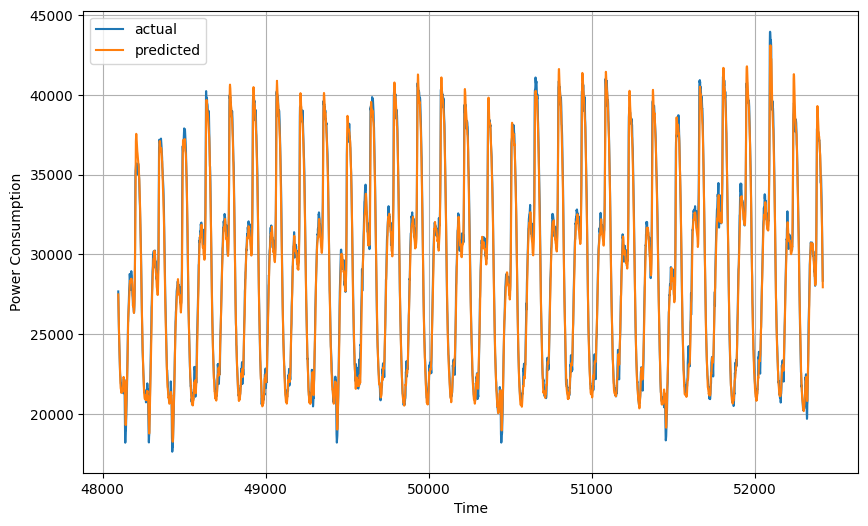

In [ ]:
#plot the graph showing the predicted value and the actual value for Zone 1 Power Comsumption
plt.figure(figsize=(10, 6))
plot_prediction(time_valid, x_valid, label='actual')
plot_prediction(time_valid, results, label='predicted')

print('Mean absolute error for prediction of Zone 1 Power Consumption: ', tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

In [ ]:
#preparing and splitting the Zone 2 Power Consumption data
series2 = tf.convert_to_tensor(data['Zone 2  Power Consumption'])
time2 = np.arange(data.shape[0])
time_train2 = time2[:split_time]
x_train2 = series2[:split_time]
time_valid2 = time2[split_time:]
x_valid2 = series2[split_time:]

In [ ]:
#forecast the Zone 2 Power Comsumption using the created model.
forecast2 = []
for time in range(len(series2) - window_size):
  forecast2.append(model.predict(series2[time:time + window_size][np.newaxis], verbose=0))
forecast2 = forecast2[split_time-window_size:]
results2 = np.array(forecast2)[:, 0, 0]

Mean absolute error for prediction of Zone 2 Power Consumption:  404.91833


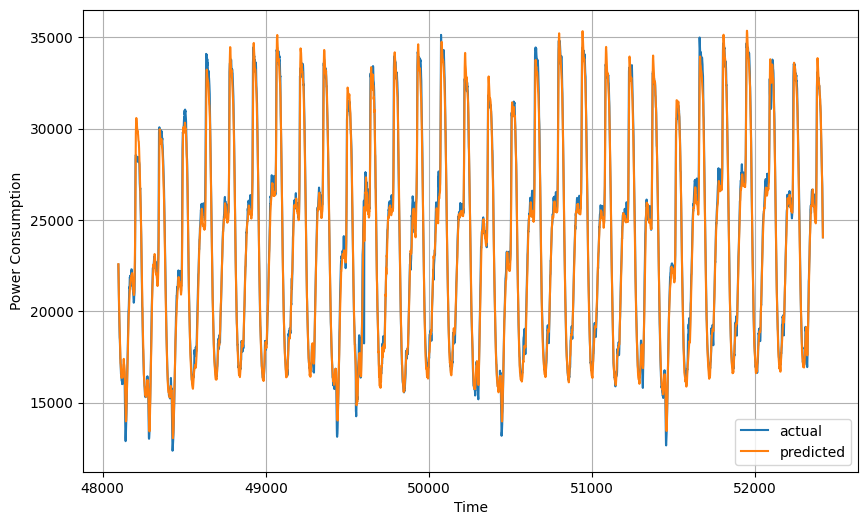

In [ ]:
#plot the graph showing the predicted value and the actual value for Zone 2 Power Comsumption
plt.figure(figsize=(10, 6))
plot_prediction(time_valid2, x_valid2, label='actual')
plot_prediction(time_valid2, results2, label='predicted')

print('Mean absolute error for prediction of Zone 2 Power Consumption: ', tf.keras.metrics.mean_absolute_error(x_valid2, results2).numpy())

In [ ]:
#preparing and splitting the Zone 3 Power Consumption data
series3 = tf.convert_to_tensor(data['Zone 3  Power Consumption'])
time3 = np.arange(data.shape[0])
time_valid3 = time3[split_time:]
x_valid3 = series3[split_time:]

In [ ]:
#forecast the Zone 3 Power Comsumption using the created model.
forecast3 = []
for time in range(len(series3) - window_size):
  forecast3.append(model.predict(series3[time:time + window_size][np.newaxis], verbose=0))
forecast3 = forecast3[split_time-window_size:]
results3 = np.array(forecast3)[:, 0, 0]

Mean absolute error for prediction of Zone 3 Power Consumption:  371.32968


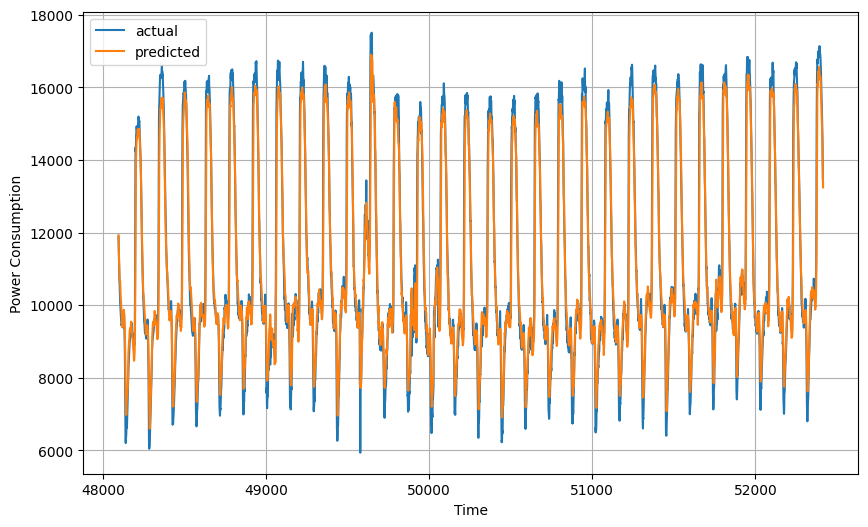

In [ ]:
#plot the graph showing the predicted value and the actual value for Zone 3 Power Comsumption
plt.figure(figsize=(10, 6))
plot_prediction(time_valid3, x_valid3, label='actual')
plot_prediction(time_valid3, results3, label='predicted')

print('Mean absolute error for prediction of Zone 3 Power Consumption: ', tf.keras.metrics.mean_absolute_error(x_valid3, results3).numpy())

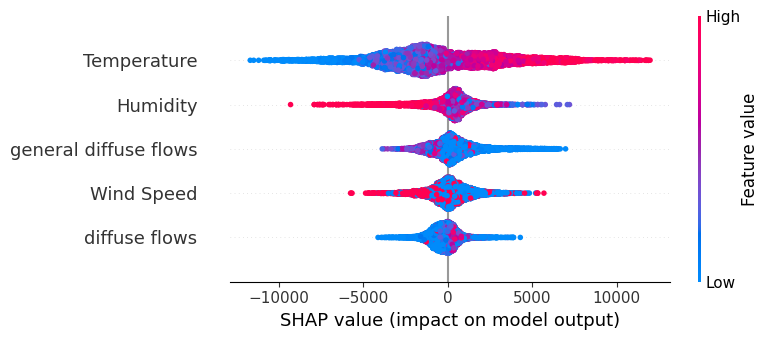

In [ ]:
#SHAP Analysis to visualize impact of features on the model output
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#drop all the target columns (Zone 1, Zone 2 and Zone 3 Power Consumption) to leave only the features in the data
X = data.drop(columns=['Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption','DateTime'])
#using only Zone 1 Power Consumption as the target variable
y1 = data['Zone 1 Power Consumption']
#split the dataset into training set and testing set
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2)
#train a RandomForestRegressor model
model2 = RandomForestRegressor()
model2.fit(X_train, y1_train)
#create a SHAP explainer for the trained model
explainer = shap.TreeExplainer(model2)
#calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)
#visualize SHAP summary plot to understand feature importances
shap.summary_plot(shap_values, X_test)
#Visualize SHAP force plot for an individual prediction (e.g., first data point)
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :])
plt.show()